In [74]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# Import csv data 
Biz_df = pd.read_csv("Raw_Data/BusinessAnalyst.csv")
#Biz_df.head() 

In [ ]:

# check for null values
Biz_df.isnull()

# data info
Biz_df.info()

# get descriptive statistics
Biz_df.describe()

# get the number of row and columns 
Biz_df.shape

# check the columns 
Biz_df.columns

# drop null values
Biz_df.dropna()


In [75]:
# Cleaning and replacing some characters and numerics 
Biz_df['Salary Estimate_cleaned'] = Biz_df['Salary Estimate'].str.replace(r'\(Glassdoor est.\)','', regex= True)
Biz_df['Salary Estimate_cleaned'] = Biz_df['Salary Estimate_cleaned'].str.replace(r'\(Employer est.\)','', regex= True)
Biz_df['Salary Estimate_cleaned'] = Biz_df['Salary Estimate_cleaned'].str.replace('$','')
Biz_df['Salary Estimate_cleaned'] = Biz_df['Salary Estimate_cleaned'].str.replace('K','')
comdf = Biz_df['Company Name'] = Biz_df['Company Name'].str.replace('\d+', '', regex=True)
comdf['Company Name'] = Biz_df['Company Name'].str.replace('\n.', '')


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_12420/1355055244.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Biz_df['Salary Estimate_cleaned'] = Biz_df['Salary Estimate_cleaned'].str.replace('$','')
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_12420/1355055244.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  comdf['Company Name'] = Biz_df['Company Name'].str.replace('\n.', '')


In [87]:
Biz_df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate_cleaned
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n.,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,107.0
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n.,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,107.0
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n.,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,107.0
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n.,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,107.0
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n.,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,107.0


In [77]:
# split the numbers in order to do the average 
Biz_df['Salary Estimate_cleaned'].str.split('-')
Biz_df['Salary Estimate_cleaned']= Biz_df['Salary Estimate_cleaned'].str.split('-')


In [78]:
# create function that will return the average
def salary_average(x):
    if len(x) == 1:
        value = x[0]
    else: 
        value =((0 if x[0] == '' else float(x[0]))+ float(x[1])/len(x))
    return value


In [79]:
# using the apply method to get the avg 
Biz_df['Salary Estimate_cleaned'] = Biz_df['Salary Estimate_cleaned'].apply(salary_average)
Biz_df['Salary Estimate_cleaned']

0       107.0
1       107.0
2       107.0
3       107.0
4       107.0
5       107.0
6       107.0
7       107.0
8       107.0
9       107.0
10      107.0
11      107.0
12      107.0
13      107.0
14      107.0
15      107.0
16      107.0
17      107.0
18      107.0
19      107.0
20      107.0
21      107.0
22      107.0
23      107.0
24      107.0
25      107.0
26      107.0
27      107.0
28      107.0
29      107.0
30       94.0
31       94.0
32       94.0
33       94.0
34       94.0
35       94.0
36       94.0
37       94.0
38       94.0
39       94.0
40       94.0
41       94.0
42       94.0
43       94.0
44       94.0
45       94.0
46       94.0
47       94.0
48       94.0
49       94.0
50       94.0
51       94.0
52       94.0
53       94.0
54       94.0
55       94.0
56       94.0
57       94.0
58       94.0
59      160.5
60      160.5
61      160.5
62      160.5
63      160.5
64      160.5
65      160.5
66      160.5
67      160.5
68      160.5
69      160.5
70      160.5
71    

In [80]:
Biz_df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate_cleaned
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n.,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,107.0
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n.,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,107.0
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n.,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,107.0
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n.,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,107.0
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n.,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,107.0


In [81]:
# check for values in rating 
Biz_df['Rating'].value_counts(ascending=True) 

rating_clean = ['-1.0','Jacksonville, FL','Orange Park, FL','Jacksonville Beach, FL',
            'Mayport, FL', 'Ponte Vedra Beach, FL', 'Fleming Island, FL']

def clean_rating(x):
    if x in rating_clean:
        return np.nan
    else:
        return x 

In [82]:
Biz_df['Rating'].apply(clean_rating)

0       3.9
1       3.8
2       3.6
3       3.6
4       3.4
5       3.4
6       3.8
7       3.8
8       4.2
9       4.4
10      3.9
11      4.4
12      4.1
13      3.6
14      4.2
15      3.1
16      3.7
17      3.8
18      3.8
19      3.4
20      3.6
21      4.2
22      3.8
23      4.7
24      4.0
25      3.7
26      3.4
27      5.0
28      3.1
29      3.2
30      4.4
31      5.0
32      3.5
33      4.2
34      4.8
35      3.6
36      3.6
37      3.8
38      4.3
39      3.8
40      3.0
41      3.9
42      3.8
43      3.5
44      3.4
45      4.5
46      4.2
47      4.4
48      3.8
49      3.9
50      3.9
51      3.4
52      4.0
53      3.7
54      3.3
55      4.2
56      3.6
57      3.6
58      3.9
59      3.5
60      2.7
61      2.8
62      4.3
63      3.6
64      NaN
65      3.0
66      3.9
67      4.7
68      3.7
69      5.0
70      3.0
71      3.7
72      4.4
73      4.7
74      4.6
75      3.6
76      NaN
77      3.9
78      4.3
79      3.8
80      4.3
81      3.6
82      3.8
83  

<AxesSubplot: >

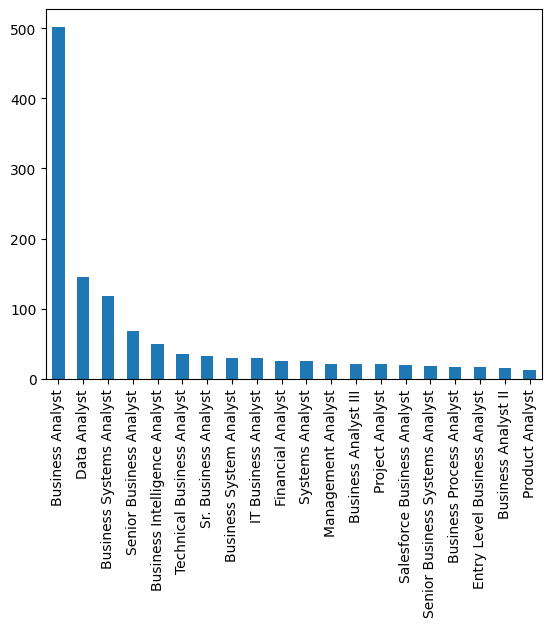

In [83]:
Biz_df['Job Title'].value_counts()
Biz_df['Job Title'].value_counts(normalize=True)[:20]
Biz_df['Job Title'].value_counts()[:20].plot(kind='bar')

In [84]:
Biz_df.isnull().sum()
Biz_df[(Biz_df['Competitors'].isnull()) & (Biz_df['Easy Apply'].isnull())].shape 

(400, 18)

In [97]:
Biz_df_clean = Biz_df.drop(labels=["Unnamed: 0", "index", "Job Description", "Competitors", "Easy Apply"], axis=1)
Biz_df_clean.columns = ["Job Title", "Salary Estimate", "Rating", "Company Name", "Location", "Headquarters", "Size", "Founded", "Type of ownership", "Industry", "Sector", "Revenue", 'Salary_Estimate_cleaned']

Biz_df_clean['Company Name']= Biz_df_clean['Company Name'].str.replace('\n.', '', regex= True)

Biz_df_clean.head()


,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary_Estimate_cleaned
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),3.9,Memorial Sloan-Kettering,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),107.0
1,Business Analyst,$56K-$102K (Glassdoor est.),3.8,Paine Schwartz Partners,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,107.0
2,Data Analyst,$56K-$102K (Glassdoor est.),3.6,Asembia,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),107.0
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),3.6,BD,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),107.0
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),3.4,Rubicon Project,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),107.0


In [ ]:
# Convert clean data into csv file
Biz_df_clean.to_csv('data/clean_data.csv', index = False) 

<AxesSubplot: xlabel='Salary_Estimate_cleaned', ylabel='Count'>

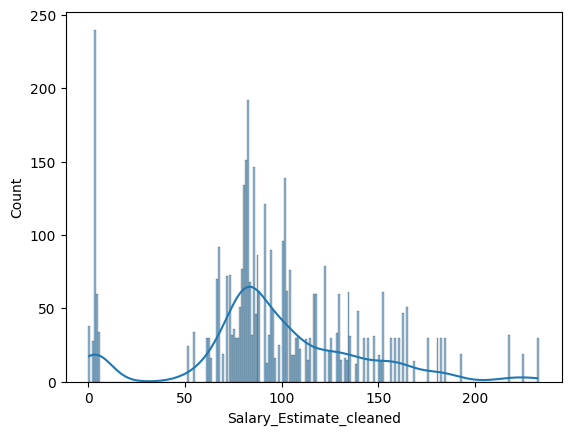

In [105]:
sns.histplot(Biz_df_clean['Salary_Estimate_cleaned'], kde= True, bins= 100) 


<AxesSubplot: >

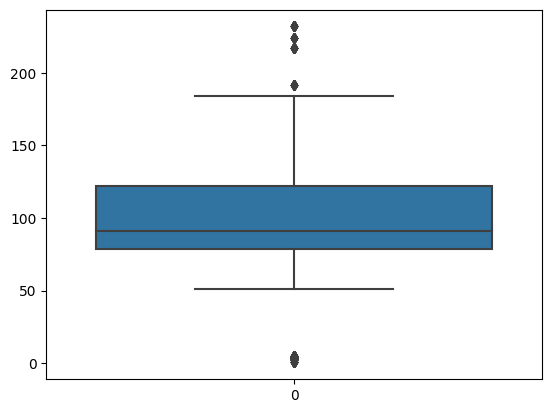

In [106]:
sns.boxplot(Biz_df_clean['Salary_Estimate_cleaned'])
